In [1]:
# Install library for reading JPK File
%pip uninstall jpkreader --yes
%pip install git+https://github.com/jlopezalo/pyjpkreader

Found existing installation: jpkreader 0.0.1
Uninstalling jpkreader-0.0.1:
  Successfully uninstalled jpkreader-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyjpkreader to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-opz3u7g6
  Running command git clone -q https://github.com/jlopezalo/pyjpkreader /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-opz3u7g6
  Created wheel for jpkreader: filename=jpkreader-0.0.1-py3-none-any.whl size=10194 sha256=d75c7caaa91a251b757bd8f246b00f2d716b8599b760d4e71257359c28e888f9
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-afxvsh67/wheels/23/c0/8e/c378f28c65b0199f6092b6aa45e090c1ed6b4093f3adb03a15
Successfully built jpkreader
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install library for AFM data Rheology Analysis
%pip uninstall pyafmrheo --yes
%pip install git+https://github.com/jlopezalo/pyafmrheo.git

Found existing installation: pyafmrheo 0.0.1
Uninstalling pyafmrheo-0.0.1:
  Successfully uninstalled pyafmrheo-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmrheo.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-il3lwyxt
  Running command git clone -q https://github.com/jlopezalo/pyafmrheo.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-il3lwyxt
  Created wheel for pyafmrheo: filename=pyafmrheo-0.0.1-py3-none-any.whl size=23116 sha256=9d827f0be6c05edf90aa767d7cf7b1a710955cb34120ab90b00bab345870c68c
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-i2q1hzbq/wheels/fb/66/18/3e93b45c845b0d7b83ded1e127a1c127820d070ce5b71dece4
Successfully built pyafmrheo
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from pyafmrheo.routines.PiezoCharacterization import doPiezoCharacterization
from pyafmrheo.routines.ViscousDragSteps import doViscousDragSteps
from pyafmrheo.routines.Microrheology import doMicrorheologyAnalysis

plt.rcParams["figure.figsize"] = (20,10)

In [4]:
piezo_char_dataset = '/Users/javierlopez/Desktop/Data/javistuff/Gels-15122021/HeadPiezo/Calibration/'
viscous_drag_dataset = '/Users/javierlopez/Desktop/Gels-16122021/AGAROSE1/vDrag/'
microrheology_dataset = '/Users/javierlopez/Desktop/Gels-16122021/AGAROSE1/HeadRheo/'

In [5]:
def getFileList(directory):
    types = ('*.jpk-force', '*.jpk-force-map') # the tuple of file types
    dataset_files = []
    for files in types:
        dataset_files.extend(glob.glob(directory + '**/' + files, recursive=True)) 
    return dataset_files

# Piezo Characterization

In [6]:
piezo_char_files = getFileList(piezo_char_dataset)
piezo_char_results = []
for file_path in piezo_char_files:
    file_result = doPiezoCharacterization(file_path)
    piezo_char_results.append(file_result)
piezo_char_results_df = pd.concat(piezo_char_results, ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 do

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 do

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


In [7]:
piezo_char_results_df

,file_id,curve_idx,frequency,fi_degrees,amp_quotient,inVols
0,16.01.12.714,0,0.6,-0.236502,0.979659,1.297318e-08
1,16.01.12.714,0,1.0,-0.040625,0.981266,1.297318e-08
2,16.01.12.714,0,10.0,0.276227,0.992141,1.297318e-08
3,16.01.12.714,0,60.0,1.475273,0.982223,1.297318e-08
4,16.01.12.714,0,120.0,2.489659,1.005135,1.297318e-08
...,...,...,...,...,...,...
184,16.04.38.920,0,120.0,2.593343,1.002152,1.297318e-08
185,16.04.38.920,0,200.0,3.245723,1.193289,1.297318e-08
186,16.04.38.920,0,800.0,16.494070,0.839759,1.297318e-08
187,16.04.38.920,0,1200.0,27.316253,0.705589,1.297318e-08


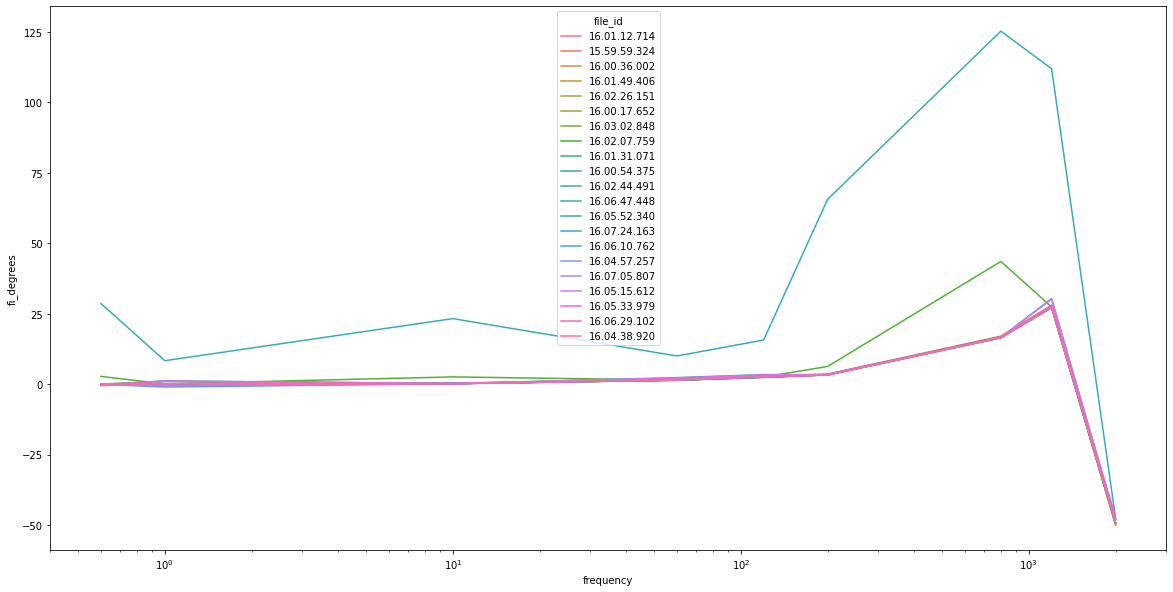

In [8]:
sns.lineplot(data=piezo_char_results_df, x="frequency", y="fi_degrees", hue="file_id")
plt.xscale('log')
plt.show()

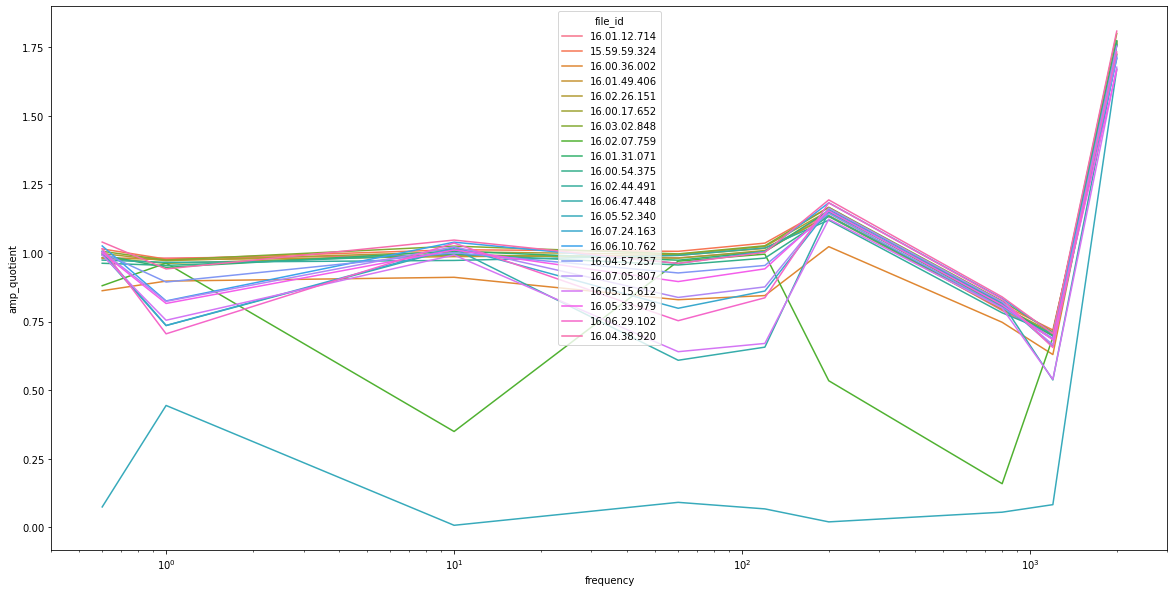

In [9]:
sns.lineplot(data=piezo_char_results_df, x="frequency", y="amp_quotient", hue="file_id")
plt.xscale('log')
plt.show()

In [10]:
grouped_piezo_char_results = piezo_char_results_df.groupby(['frequency'], as_index=False).mean()

In [11]:
grouped_piezo_char_results

,frequency,curve_idx,fi_degrees,amp_quotient,inVols
0,0.6,0,1.441895,0.942390,1.297318e-08
1,1.0,0,0.494720,0.868780,1.297318e-08
2,10.0,0,1.427159,0.925726,1.297318e-08
3,60.0,0,2.022623,0.864161,1.297318e-08
4,120.0,0,3.302950,0.896714,1.297318e-08
5,200.0,0,6.454856,1.063601,1.297318e-08
6,800.0,0,23.080025,0.740576,1.297318e-08
7,1200.0,0,31.753296,0.646691,1.297318e-08
8,2000.0,0,-48.665404,1.740892,1.297318e-08


In [12]:
grouped_piezo_char_results.describe()

,frequency,curve_idx,fi_degrees,amp_quotient,inVols
count,9.000000,9.0,9.000000,9.000000,9.000000e+00
mean,487.955556,0.0,2.368013,0.965503,1.297318e-08
std,706.682013,0.0,22.135491,0.314157,1.754715e-24
min,0.600000,0.0,-48.665404,0.646691,1.297318e-08
25%,10.000000,0.0,1.427159,0.864161,1.297318e-08
50%,120.000000,0.0,2.022623,0.896714,1.297318e-08
75%,800.000000,0.0,6.454856,0.942390,1.297318e-08
max,2000.000000,0.0,31.753296,1.740892,1.297318e-08


# Viscous Drag

In [13]:
vdrag_files = getFileList(viscous_drag_dataset)
vdrag_results = []
for file_path in vdrag_files:
    file_result = doViscousDragSteps(file_path, piezoCharData=grouped_piezo_char_results)
    vdrag_results.append(file_result)
vdrag_results_df = pd.concat(vdrag_results, ignore_index=True)

Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '



5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 d

ValueError: can only convert an array of size 1 to a Python scalar

In [14]:
vdrag_results_df

NameError: name 'vdrag_results_df' is not defined

In [ ]:
vdrag_results_df.describe()

In [ ]:
sns.scatterplot(data=vdrag_results_df, x="distance", y="Bh", hue="file_id", s=100)
plt.show()

In [ ]:
grouped_vdrag_results = vdrag_results_df.groupby(['distance'], as_index=False).mean()
# grouped_vdrag_results = vdrag_results_df.groupby(['distance'], as_index=False).median()

In [ ]:
grouped_vdrag_results

In [ ]:
sns.scatterplot(data=grouped_vdrag_results, x="distance", y="Bh", s=100)
plt.show()

# Microrheology

In [ ]:
# Define parameters for data analysis
poc_win_size = 50
indenter_shape = 'paraboloid'
tip_parameter = 75 * 1e-9

In [ ]:
microrheo_files = getFileList(microrheology_dataset)
microrheo_results = []
for file_path in microrheo_files:
    file_result = doMicrorheologyAnalysis(file_path, poc_win_size, indenter_shape, tip_parameter)
    microrheo_results.append(file_result)
microrheo_results_df = pd.concat(microrheo_results, ignore_index=True)

In [ ]:
microrheo_results_df

In [ ]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="G_storage", hue="file_id", s=100)
plt.xscale('log')
plt.show()

In [ ]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="G_loss", hue="file_id", s=100)
plt.xscale('log')
plt.show()

In [ ]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="loss_tan", hue="file_id", s=100)
plt.xscale('log')
plt.show()

In [ ]:
microrheo_results_results = microrheo_results_df.groupby(['frequency'], as_index=False).mean()

In [ ]:
microrheo_results_results

In [ ]:
sns.scatterplot(data=microrheo_results_results, x="frequency", y="G_storage", s=100)
sns.scatterplot(data=microrheo_results_results, x="frequency", y="G_loss", s=100)
plt.xscale('log')
plt.show()